<a href="https://colab.research.google.com/github/FECONGroup01/FECON-Project/blob/main/LSTM_Based_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [4]:
df=pd.read_csv("TATAMOTORS.csv")
df['Date'] = pd.to_datetime(df['Date'])
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (246, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,430.950012,436.399994,422.250000,424.450012,424.450012,6807536
1,2018-01-02,428.850006,440.850006,422.000000,439.299988,439.299988,15331261
2,2018-01-03,440.399994,441.399994,431.950012,433.899994,433.899994,9794953
3,2018-01-04,430.000000,433.299988,425.750000,429.950012,429.950012,8395377
4,2018-01-05,431.250000,436.350006,429.799988,431.600006,431.600006,7021611


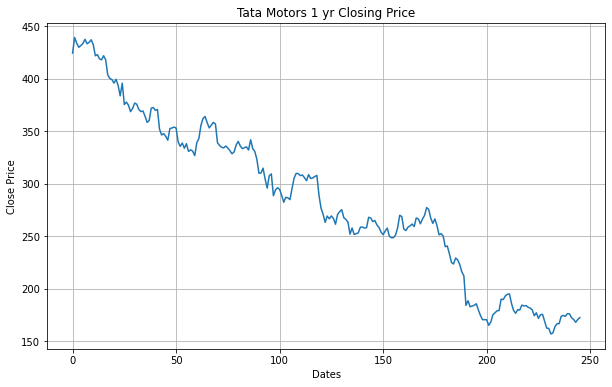

In [5]:
#Visualization of the data
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.title('Tata Motors 1 yr Closing Price')
plt.show()

In [6]:
df1=df.reset_index()['Close']

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
print(df1)

[[0.94737783]
 [1.        ]
 [0.98086466]
 [0.96686755]
 [0.97271445]
 [0.97962438]
 [0.99379872]
 [0.97873848]
 [0.98387672]
 [0.99220417]
 [0.97537214]
 [0.93834162]
 [0.94206245]
 [0.9278881 ]
 [0.92469879]
 [0.93834162]
 [0.92452165]
 [0.87349403]
 [0.86180013]
 [0.85807941]
 [0.84603124]
 [0.85896531]
 [0.83823531]
 [0.80315382]
 [0.84585399]
 [0.7737421 ]
 [0.78206944]
 [0.77161592]
 [0.75000003]
 [0.76080792]
 [0.7787031 ]
 [0.77498227]
 [0.7570872 ]
 [0.75000003]
 [0.75194896]
 [0.73476265]
 [0.71367827]
 [0.71970241]
 [0.76169382]
 [0.76346561]
 [0.75407513]
 [0.7570872 ]
 [0.69082209]
 [0.67115523]
 [0.67576185]
 [0.66637137]
 [0.6534373 ]
 [0.69277113]
 [0.69472006]
 [0.69790926]
 [0.69454292]
 [0.64723602]
 [0.63288454]
 [0.64386957]
 [0.62632888]
 [0.64174351]
 [0.61569813]
 [0.62101351]
 [0.61676116]
 [0.60152378]
 [0.64510985]
 [0.65910706]
 [0.70340189]
 [0.72678958]
 [0.73352237]
 [0.71296951]
 [0.69507444]
 [0.70411054]
 [0.71332389]
 [0.70854002]
 [0.64510985]
 [0.63

In [9]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.8)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [10]:
training_size,test_size

(196, 50)

In [11]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [29]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
import numpy
time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

array([0.02923459, 0.04039686, 0.06467045, 0.07140324, 0.0779589 ,
       0.07919912, 0.11764706, 0.11587526, 0.12810062, 0.13377038,
       0.1351878 , 0.10258681, 0.07937631, 0.06980864, 0.08185681,
       0.08079373, 0.09744862, 0.09443655, 0.09585397, 0.09018426,
       0.08734938, 0.0813253 , 0.06148119, 0.07140324, 0.05262223,
       0.06502478, 0.06608786, 0.04287736, 0.01966686, 0.01878097,
       0.        , 0.00354359, 0.0248051 , 0.03454997, 0.03490429,
       0.0597094 , 0.06254428, 0.05953221, 0.06839117, 0.06785966,
       0.05457121, 0.04890145, 0.03951097, 0.04872431])

In [13]:
print(X_train.shape), print(y_train.shape)

(190, 5)
(190,)


(None, None)

In [14]:
print(X_test.shape), print(ytest.shape)

(44, 5)
(44,)


(None, None)

In [15]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [16]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(5,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 50)             10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 50)             20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
3/3 [==============================] - 5s 562ms/step - loss: 0.3128 - val_loss: 0.0021
Epoch 2/100
3/3 [==============================] - 0s 25ms/step - loss: 0.2623 - val_loss: 0.0010
Epoch 3/100
3/3 [==============================] - 0s 23ms/step - loss: 0.1866 - val_loss: 0.0050
Epoch 4/100
3/3 [==============================] - 0s 26ms/step - loss: 0.1033 - val_loss: 0.0209
Epoch 5/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0380 - val_loss: 0.0624
Epoch 6/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0155 - val_loss: 0.1136
Epoch 7/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0459 - val_loss: 0.1023
Epoch 8/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0272 - val_loss: 0.0696
Epoch 9/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0115 - val_loss: 0.0483
Epoch 10/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0155 - val_loss: 0.0397
Epoch 11/100
3/3 [

In [19]:
import tensorflow as tf

In [20]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [21]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [22]:
train_predict

array([[429.8339 ],
       [433.43283],
       [430.90646],
       [430.55594],
       [432.1757 ],
       [433.53323],
       [434.16656],
       [432.40164],
       [431.4942 ],
       [428.74435],
       [423.4594 ],
       [418.96982],
       [418.26416],
       [416.12048],
       [414.25586],
       [411.13913],
       [404.34467],
       [397.36093],
       [395.23944],
       [393.42636],
       [391.38116],
       [389.48264],
       [384.47742],
       [380.22968],
       [378.63956],
       [370.41632],
       [369.7765 ],
       [368.02844],
       [367.29703],
       [369.04257],
       [369.40408],
       [366.95233],
       [363.72778],
       [361.52673],
       [359.83533],
       [358.0187 ],
       [358.6233 ],
       [362.5696 ],
       [365.90457],
       [363.04126],
       [357.8959 ],
       [351.65936],
       [342.87042],
       [340.72922],
       [341.0185 ],
       [341.30872],
       [343.33264],
       [347.0985 ],
       [345.64566],
       [342.69397],


In [39]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytest,test_predict))


187.6771452587279

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


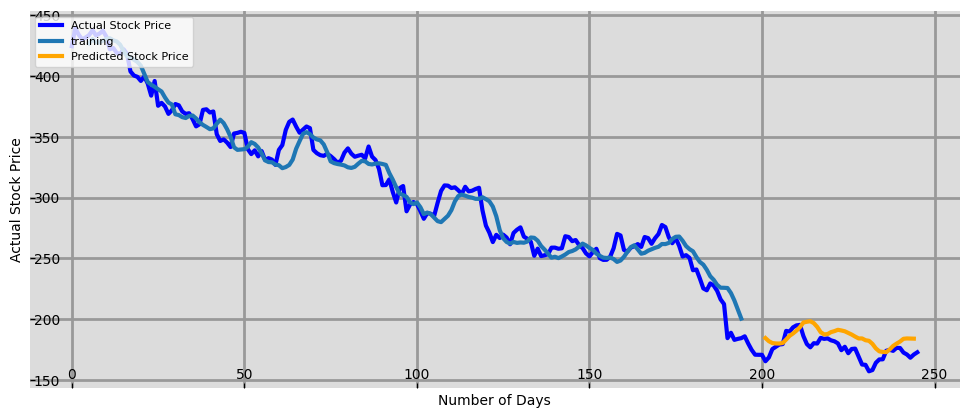

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=5
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.figure(figsize=(12,5), dpi=100)
plt.grid(color='#999999',linewidth=2)
ax=plt.axes()
ax.set_facecolor("#DCDCDC")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
plt.plot(scaler.inverse_transform(df1),color = 'blue',label='Actual Stock Price',linewidth=3)
plt.plot(trainPredictPlot,label='training',linewidth=3)
plt.plot(testPredictPlot,color = 'orange',label='Predicted Stock Price',linewidth=3)
plt.xlabel("Number of Days")
plt.ylabel("Actual Stock Price")
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [50]:
#Evaluation metrics
rmse=math.sqrt(mean_squared_error(ytest,test_predict))
print('RMSE: '+str(rmse))
mae = mean_absolute_error(ytest, test_predict)
print('MAE: '+str(mae))
mse = mean_squared_error(ytest,test_predict)
print('MSE: '+str(mse))
mape=np.mean(np.abs((ytest - test_predict) / ytest)) * 100
#mape =(mae-np.mean(np.abs(ytest)))/np.mean(np.abs(ytest))*100
print('MAPE: '+str(mape))
x=np.mean(np.abs(ytest))
print(x)

RMSE: 187.6771452587279
MAE: 187.57253309525194
MSE: 35222.71085246566
MAPE: inf
0.06727174483596593


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
